# Ядерный практикум. Задача №5
## Электромагнитные взаимодействия.Определение энергии $\gamma$ -квантов с помощью сцинтилляционного спектрометра

**Цель работы:** определение энергии $\gamma$-излучения неизвестного источника. Измерения проводятся с помощью сцинтилляционного спектрометра.

In [49]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 100

### Упражнение 1.
Для начала необходимо проградуировать $\gamma$-спектрометр, т.е. получить зависимость номера канала амплитудного анализатора от энергии $\gamma$-кванта. Для этого нужно измерить спектры величин импульсов от двух $\gamma$-источников с известными энергиями $\gamma$-квантов. В полученных спектрах выделить пики полного поглощения (фотопики). Построить график зависимости номера канала фотопика от энергии $\gamma$-излучения.

Построим грауировочную кривую используя МНК: $ E = k\bullet n+b $

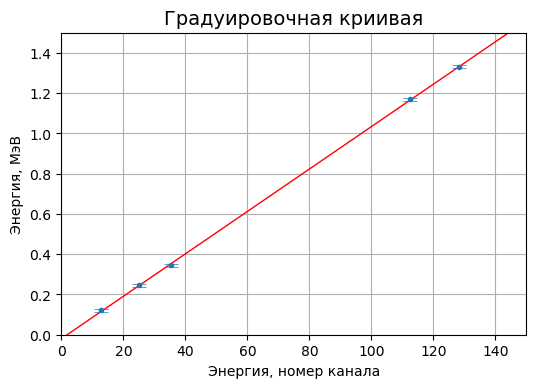

Результат МНК:
k = (0.01053277858311731 ± 6.827297787241238e-05) МэВ
b = (-0.01961028982444297 ± 0.005391134564463123) МэВ


In [60]:
data1 = np.loadtxt('data1.txt')
def mnk(data):
  N = data.shape[0] # количество строк
  x, y = data[:, 0], data[:, 1] # х - первый столбец. у - второй

  mx, my = x.sum(), y.sum()
  a1, a2 = np.dot(x.T, y), np.dot(x.T, x) # скалярное произведение столбцов
  # .Т - транспонирование     .dot - почленное произвеедние
  k = (N*a1 - mx*my)/(N*a2 - mx**2)
  b = (a2*my - mx*a1)/(N*a2 - mx**2)
  s0 = np.dot((y-k*x-b).T, (y-k*x-b))/(N-2)
  dk = (s0*N/(N*a2 - mx**2))**(1/2)
  db = (s0*a2/(N*a2 - mx**2))**(1/2)
  f = np.array([k*z+b for z in range(150)])
  return k, dk, b, db, f, s0

k, dk, b, db, f, s0 = mnk(data1)
plt.ylabel('Энергия, МэВ')
plt.xlabel('Энергия, номер канала')
plt.xlim((0, 150))
plt.ylim((0, 1.5))
plt.title('Градуировочная криивая', fontsize=14)
plt.plot(f, c='red', lw = 1) #рисуем прямую МНК

plt.scatter(data1[:,0], data1[:,1], s=1, c='black') #рисуем точки
plt.errorbar(data1[:,0], data1[:,1], yerr=s0**(1/2), fmt='.', capsize=5, capthick=0.5); #рисуем погрешности
plt.grid(True)
plt.show()
print ('Результат МНК:')
print ('k = ({k} ± {dk}) МэВ'.format(k=k, dk=dk))
print ('b = ({b} ± {db}) МэВ'.format(b=b, db=db))

### Упражнение 2.

Оценить разрешающую способность $\gamma$-спектрометра, определив величину Γ — ширину пика на половине его высоты.

In [55]:
data2 = np.loadtxt('data2.txt')

G = np.absolute(data2*k + b)

co = G[0:2]
eu = G[2:5]
unt = G[5:]

print('Co-60 разрешение')
for i, j in enumerate(co):
  print('{i} пик: {j}'.format(i=i+1, j=j), 'МэВ')

print('\nEu-152 разрешение')
for i, j in enumerate(eu):
  print('{i} пик: {j}'.format(i=i+1, j=j), 'МэВ')

print('\nНеизвестный источник разрешение')
for i, j in enumerate(unt):
  print('{i} пик: {j}'.format(i=i+1, j=j), 'МэВ')

Co-60 разрешение
1 пик: 0.06610546228496568 МэВ
2 пик: 0.06761270290020978 МэВ

Eu-152 разрешение
1 пик: 0.0009812923055513671 МэВ
2 пик: 0.007282000453972141 МэВ
3 пик: 0.016744648733044733 МэВ

Неизвестный источник разрешение
1 пик: 0.023175963335896162 МэВ
2 пик: 0.04344208260767217 МэВ
3 пик: 0.03469039688296001 МэВ
4 пик: 0.07232822787187139 МэВ


### Упражнение 3
Определить энергию пика полного поглощения по данным ранее выполненной градуировки. По разрешающей способности спектрометра и полученным распределениям оценить ошибку определения энергии $\Delta E$ для $\gamma$-квантов от неизвестного источника. Представить результат в виде 
$$\begin{equation}E(X) = E ± ∆E\end{equation}$$

In [53]:
data3 = np.loadtxt('data3.txt')

e_unt = k*data3 + b
de_unt = np.sqrt(dk**2+db**2+unt**2)

print('Энергия пиков неизвестного источника')
for i in range(data3.shape[0]):
  print('{i} пик: ({e} ± {de}) МэВ'.format(i=i, e=e_unt[i], de=de_unt[i]))

Энергия пиков неизвестного источника
0 пик: (0.31743862483531093 ± 0.0237948370374428) МэВ
1 пик: (0.8728215067445034 ± 0.0437753758908301) МэВ
2 пик: (2.403139439864201 ± 0.035106874383643696) МэВ
3 пик: (6.035894773181361 ± 0.07252890141300232) МэВ
